# Day 9: Evaluating Your Classification Model Better


---


**why?**
 *  Because accuracy alone can hide mistakes, especially if the dataset is small or imbalanced.



---

**Step 1: Imports**

In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


In [5]:
from google.colab import files
uploaded = files.upload()


Saving day8_students_data.csv to day8_students_data.csv


**Step 2: Load the CSV**

In [19]:
df = pd.read_csv("day8_students_data.csv")
df['Passed'] = df['Passed'].map({'Yes': 1, 'No': 0})
df = df.dropna(subset=['Passed'])


**Step 3: Prepare the Data**

In [20]:
X = df[['Age', 'Marks']]
y = df['Passed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 4: Train the Model**

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Step 5: Evaluate the Model

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [23]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1 0]
 [0 1]]


In [24]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



**Step 6: Plot Confusion Matrix**

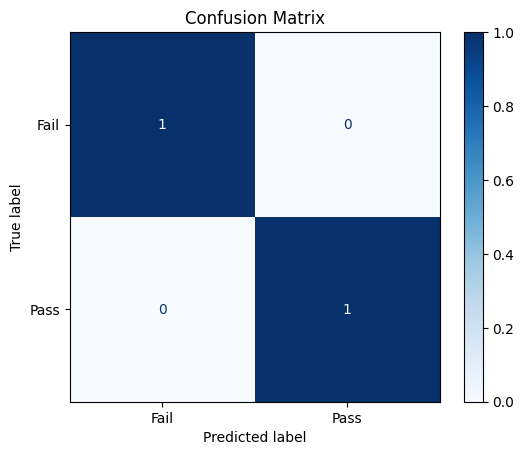

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()